## Notebook Description
This notebook is dedicated to Feature Engineering and EDA on the clean data read in from the `clean_data` folder. It will look at the data in one dataframe, then split the data into two dataframes (one for each Subreddit), to look at the data independently. It will also look at the Feature Engineered columns to exploit patterns amongst the data.

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

In [2]:
df = pd.read_csv('../raw_data/reddit.csv')
df.head()

,title,selftext,subreddit,created_utc
0,We’d comfort in the back country? Check these ...,NaN,backpacking,1646363240
1,Finding water on the trail,"Yo waddup every1, I was wondering how I might ...",backpacking,1646363128
2,Pacing Tips,Hey y'all! I've just been backpacking in Mexic...,backpacking,1646359058
3,Fes Morocco 5 hr layover,[removed],backpacking,1646358302
4,"Hi all, I have a favor to ask. I designed a mo...",NaN,backpacking,1646356995


In [3]:
df.isnull().sum()

title             0
selftext       1420
subreddit         0
created_utc       0
dtype: int64

In [4]:
df['selftext'] = df['selftext'].fillna('')
df.isnull().sum()

title          0
selftext       0
subreddit      0
created_utc    0
dtype: int64

#### Baseline Model

In [5]:
# Baseline model
df['subreddit'].value_counts(normalize=True)

ultrarunning    0.500125
backpacking     0.499875
Name: subreddit, dtype: float64

# Feature Engineering

## Merging Title and Selftext columns

In [6]:
df['title_merge'] = df['title'] + ' ' + df['selftext']
df.drop(columns=['title','selftext'], inplace=True)
df.head()

,subreddit,created_utc,title_merge
0,backpacking,1646363240,We’d comfort in the back country? Check these ...
1,backpacking,1646363128,"Finding water on the trail Yo waddup every1, I..."
2,backpacking,1646359058,Pacing Tips Hey y'all! I've just been backpack...
3,backpacking,1646358302,Fes Morocco 5 hr layover [removed]
4,backpacking,1646356995,"Hi all, I have a favor to ask. I designed a mo..."


## Feature Engineering & Sentiment Scores

In [7]:
# Sentiment Scores
sia = SentimentIntensityAnalyzer()

df['title_sentiment'] = df['title_merge'].apply(sia.polarity_scores)
df['title_sentiment_neg'] = df['title_sentiment'].map(lambda x: x['neg'])
df['title_sentiment_neu'] = df['title_sentiment'].map(lambda x: x['neu'])
df['title_sentiment_pos'] = df['title_sentiment'].map(lambda x: x['pos'])
df['title_sentiment_compound'] = df['title_sentiment'].map(lambda x: x['compound'])

In [8]:
# Counting Capitals in string
def count_capitals(row):
    count = 0 
    for i in row:
        if i.isupper():
            count += 1
    return count

In [9]:
# Counting sentences in a string
def words_in_sentence(row):
    return len((re.split(r'[.!?]+', row))) - 1

In [10]:
# Feature Engineering based on Title characteristics

df['title_length'] = df['title_merge'].str.len()
df['title_word_count'] = [len(title.split(' ')) for title in df['title_merge']]
df['capitalized_letters_in_title'] = df['title_merge'].map(count_capitals)
df['sentences_in_title'] = df['title_merge'].map(words_in_sentence)
df.head()

,subreddit,created_utc,title_merge,title_sentiment,title_sentiment_neg,title_sentiment_neu,title_sentiment_pos,title_sentiment_compound,title_length,title_word_count,capitalized_letters_in_title,sentences_in_title
0,backpacking,1646363240,We’d comfort in the back country? Check these ...,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...",0.000,0.741,0.259,0.4199,51,10,2,2
1,backpacking,1646363128,"Finding water on the trail Yo waddup every1, I...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,255,49,15,2
2,backpacking,1646359058,Pacing Tips Hey y'all! I've just been backpack...,"{'neg': 0.104, 'neu': 0.859, 'pos': 0.037, 'co...",0.104,0.859,0.037,-0.7808,550,95,14,6
3,backpacking,1646358302,Fes Morocco 5 hr layover [removed],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,34,6,2,0
4,backpacking,1646356995,"Hi all, I have a favor to ask. I designed a mo...","{'neg': 0.0, 'neu': 0.628, 'pos': 0.372, 'comp...",0.000,0.628,0.372,0.9413,268,44,12,4


In [11]:
# Drop title_sentiment column because it's a dictionary and I have the columns on their own 
df.drop(columns='title_sentiment', inplace=True)
df.head()

,subreddit,created_utc,title_merge,title_sentiment_neg,title_sentiment_neu,title_sentiment_pos,title_sentiment_compound,title_length,title_word_count,capitalized_letters_in_title,sentences_in_title
0,backpacking,1646363240,We’d comfort in the back country? Check these ...,0.000,0.741,0.259,0.4199,51,10,2,2
1,backpacking,1646363128,"Finding water on the trail Yo waddup every1, I...",0.000,1.000,0.000,0.0000,255,49,15,2
2,backpacking,1646359058,Pacing Tips Hey y'all! I've just been backpack...,0.104,0.859,0.037,-0.7808,550,95,14,6
3,backpacking,1646358302,Fes Morocco 5 hr layover [removed],0.000,1.000,0.000,0.0000,34,6,2,0
4,backpacking,1646356995,"Hi all, I have a favor to ask. I designed a mo...",0.000,0.628,0.372,0.9413,268,44,12,4


#### Exporting data with Title and Selftext merged to `engineered_data` folder

In [13]:
# Write engineered data to CSV to be used in modeling
df.to_csv('../engineered_data/engineered_data_merged_columns.csv', index=False)

### Splitting Dataframe into Two Dataframes: Backpacking & Ultrarunning

In [14]:
df_backpacking = df[df['subreddit'] == 'backpacking']
df_backpacking.head()

,subreddit,created_utc,title_merge,title_sentiment_neg,title_sentiment_neu,title_sentiment_pos,title_sentiment_compound,title_length,title_word_count,capitalized_letters_in_title,sentences_in_title
0,backpacking,1646363240,We’d comfort in the back country? Check these ...,0.000,0.741,0.259,0.4199,51,10,2,2
1,backpacking,1646363128,"Finding water on the trail Yo waddup every1, I...",0.000,1.000,0.000,0.0000,255,49,15,2
2,backpacking,1646359058,Pacing Tips Hey y'all! I've just been backpack...,0.104,0.859,0.037,-0.7808,550,95,14,6
3,backpacking,1646358302,Fes Morocco 5 hr layover [removed],0.000,1.000,0.000,0.0000,34,6,2,0
4,backpacking,1646356995,"Hi all, I have a favor to ask. I designed a mo...",0.000,0.628,0.372,0.9413,268,44,12,4


In [15]:
df_ultrarunning = df[df['subreddit'] == 'ultrarunning']
df_ultrarunning.head()

,subreddit,created_utc,title_merge,title_sentiment_neg,title_sentiment_neu,title_sentiment_pos,title_sentiment_compound,title_length,title_word_count,capitalized_letters_in_title,sentences_in_title
1999,ultrarunning,1646336942,"Narrow Feet Trail Shoe Recs Hi Y'all, \n\nJust...",0.046,0.769,0.185,0.9934,1610,304,48,10
2000,ultrarunning,1646321962,"Shoe sizing I typically wear a 12.5, does any ...",0.000,0.910,0.090,0.4515,201,34,6,5
2001,ultrarunning,1646270995,Advice: Sledge/pulk design for a winter ultram...,0.016,0.898,0.086,0.9939,3667,612,59,31
2002,ultrarunning,1646253091,venting - dumb clinics I put a hard stop on my...,0.092,0.872,0.037,-0.7269,584,119,12,7
2003,ultrarunning,1646191139,Phantom Stress Pains Hey everyone - I had a st...,0.123,0.789,0.088,-0.3679,1125,209,24,17


### EDA on Newly Engineered Dataframe (prior to CountVectorize)

In [ ]:
df.head()

,subreddit,created_utc,title_merge,title_sentiment_neg,title_sentiment_neu,title_sentiment_pos,title_sentiment_compound,title_length,title_word_count,capitalized_letters_in_title,sentences_in_title
0,backpacking,1646363240,We’d comfort in the back country? Check these ...,0.000,0.741,0.259,0.4199,51,10,2,2
1,backpacking,1646363128,"Finding water on the trail Yo waddup every1, I...",0.000,1.000,0.000,0.0000,255,49,15,2
2,backpacking,1646359058,Pacing Tips Hey y'all! I've just been backpack...,0.104,0.859,0.037,-0.7808,550,95,14,6
3,backpacking,1646358302,Fes Morocco 5 hr layover [removed],0.000,1.000,0.000,0.0000,34,6,2,0
4,backpacking,1646356995,"Hi all, I have a favor to ask. I designed a mo...",0.000,0.628,0.372,0.9413,268,44,12,4


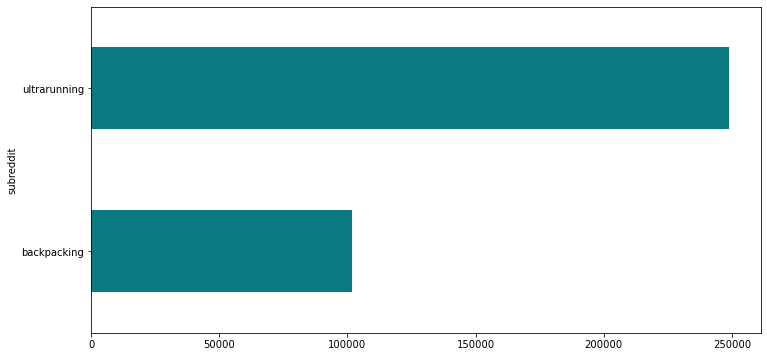

In [17]:
df.groupby('subreddit').sum()['title_word_count'].sort_values(ascending=True).plot.barh(figsize=(12,6), color = '#097a80');

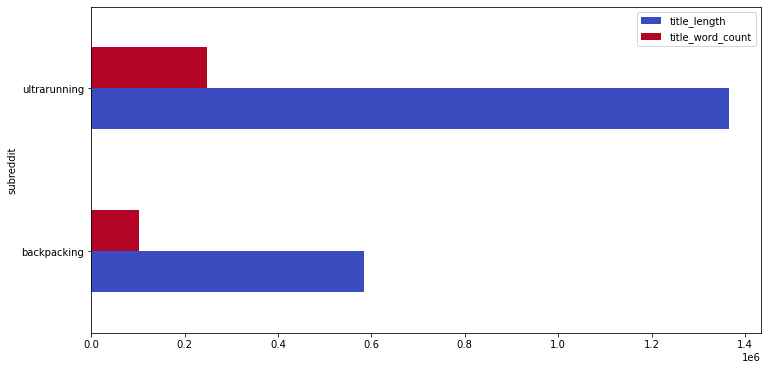

In [18]:
df.groupby(['subreddit']).sum()[['title_length','title_word_count']].plot.barh(cmap='coolwarm', figsize=(12,6));

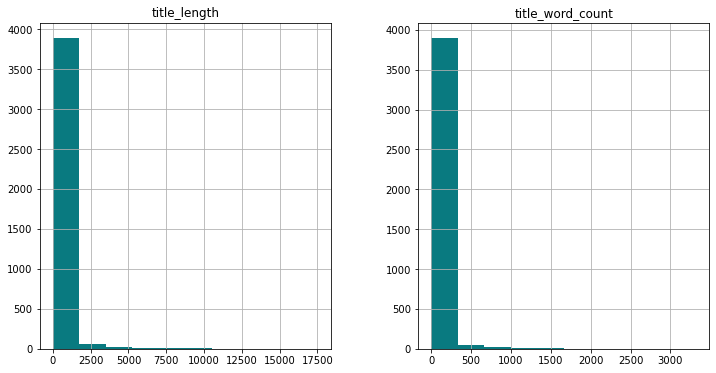

In [19]:
df[['title_length', 'title_word_count']].hist(figsize=(12,6), color = '#097a80');

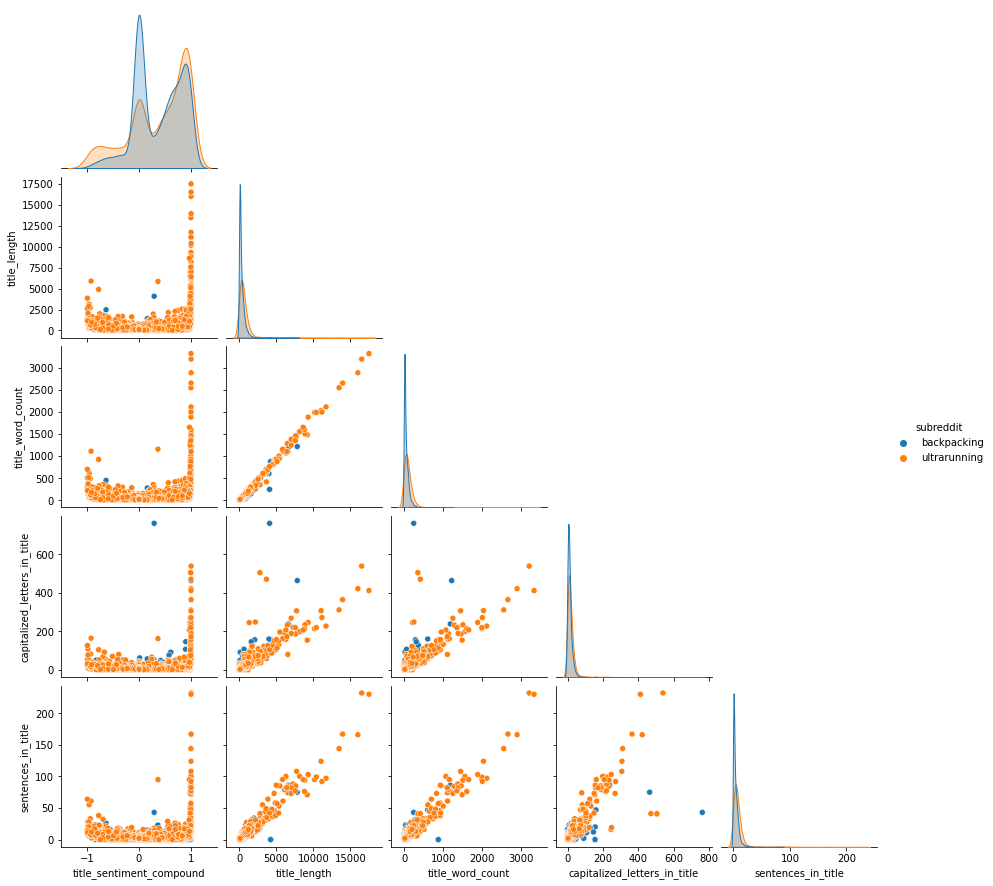

In [20]:
sns.pairplot(df, x_vars=['title_sentiment_compound','title_length', 'title_word_count',
                         'capitalized_letters_in_title', 'sentences_in_title'],
                 y_vars=['title_sentiment_compound','title_length', 'title_word_count',
                         'capitalized_letters_in_title', 'sentences_in_title'],
                         hue='subreddit',
                         corner=True);

### Set up for CountVectorizer

In [21]:
# Set up for CountVectorizer

X = df['title_merge']
y = df['subreddit']

In [23]:
# Train/Test/Split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
# Instantiate a CountVectorizer with the default hyperparameters and stop_words
cvec = CountVectorizer(stop_words='english')

In [26]:
# Fit the vectorizer on my corpus
cvec.fit(X_train)

CountVectorizer(stop_words='english')

In [27]:
# Transform the corpus
X_train = cvec.transform(X_train)

# Transform test
X_test = cvec.transform(X_test)

In [28]:
# View some of the feature_names

cvec.get_feature_names()[1000:1010]

['657m',
 '65k',
 '65km',
 '65l',
 '65miles',
 '65mpw',
 '663',
 '664',
 '66b143494b45d7067e4f6a6a9e8a7e46596b3abd',
 '66k']

In [29]:
X_train_df = pd.DataFrame(X_train.todense(),
                         columns=cvec.get_feature_names())

## EDA on CountVectorized Title

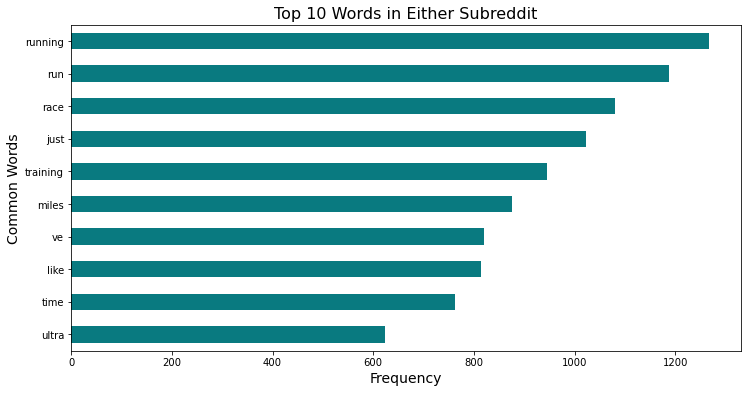

In [30]:
# Top 20 occurring words in either subreddits - using both Title & Selftext columns merged. 
X_train_df.sum(numeric_only=True).sort_values(ascending=True).tail(10).plot.barh(figsize=(12,6), color = '#097a80')
plt.xlabel('Frequency', fontdict= {'fontsize':14})
plt.ylabel('Common Words', fontdict= {'fontsize':14})
plt.title('Top 10 Words in Either Subreddit', fontdict = {'fontsize':16})
plt.savefig("../graphics/Top_10_words_either_subreddit_title_and_selftext.jpg", bbox_inches="tight", dpi=100); #save as jpg

### Sentiment Distribution
Since I performed Sentiment Analysis by Subreddit, I wanted to see how they compared to each other. It looks like the Ultrarunning subreddit is a bit more positive than Backpacking... which is largely neutral

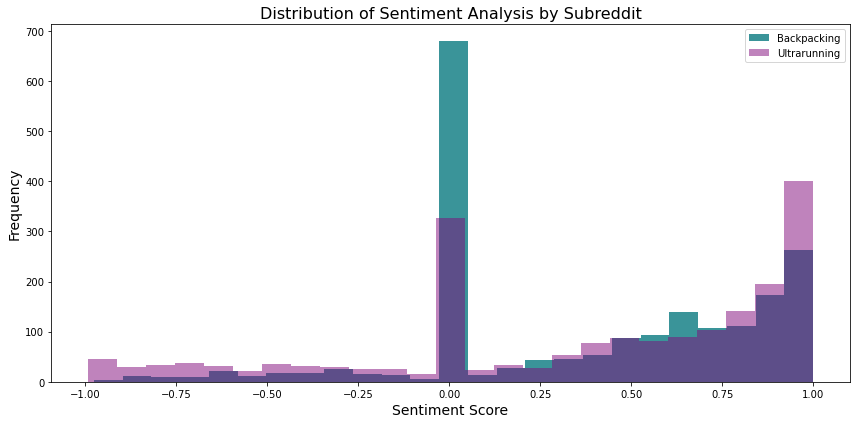

In [31]:
plt.figure(figsize=(12,6))
plt.hist(df_backpacking['title_sentiment_compound'], color ='#097a80', label='Backpacking', alpha = 0.8, bins=25)
plt.hist(df_ultrarunning['title_sentiment_compound'], color = '#80097a', label='Ultrarunning', alpha = 0.5, bins=25)
plt.xlabel('Sentiment Score', fontdict= {'fontsize':14})
plt.ylabel('Frequency', fontdict= {'fontsize':14})
plt.title('Distribution of Sentiment Analysis by Subreddit', fontdict = {'fontsize':16})
plt.legend()
plt.tight_layout()
plt.savefig("../graphics/sentinment_distribution.jpg", bbox_inches="tight", dpi=100); #save as jpg;